# Età coppie

In [1]:
# In the mother-child rule, ind1 is the child and ind2 is the father.
male_sex   = ("SESSO", "==", 1)
female_sex = ("SESSO", "==", 2)

couples_rules = [
    {"name": "RELPAR_1_2",
    "ind1": [("RELPAR", "==", 1)],
    "ind2": [("RELPAR", "==", 2)]},
    {"name": "RELPAR_1_3",
    "ind1": [("RELPAR", "==", 1)],
    "ind2": [("RELPAR", "==", 3)]},
    {"name": "RELPAR_4_4",
    "ind1": [("RELPAR", "==", 4)],
    "ind2": [("RELPAR", "==", 4)]},
    {"name": "RELPAR_5_5",
    "ind1": [("RELPAR", "==", 5)],
    "ind2": [("RELPAR", "==", 5)]},
    {"name": "RELPAR_7_8_mf",
    "ind1": [("RELPAR", "==", 7), male_sex],
    "ind2": [("RELPAR", "==", 8), female_sex]},
    {"name": "RELPAR_7_8_fm",
    "ind1": [("RELPAR", "==", 7), female_sex],
    "ind2": [("RELPAR", "==", 8), male_sex]},
    {"name": "RELPAR_7_9_mf",
    "ind1": [("RELPAR", "==", 7), male_sex],
    "ind2": [("RELPAR", "==", 9), female_sex]},
    {"name": "RELPAR_7_9_fm",
    "ind1": [("RELPAR", "==", 7), female_sex],
    "ind2": [("RELPAR", "==", 9), male_sex]},
    {"name": "fallback_RELPAR_6_8_mf",
    "ind1": [("RELPAR", "==", 6), male_sex],
    "ind2": [("RELPAR", "==", 8), female_sex]},
    {"name": "fallback_RELPAR_6_8_fm",
    "ind1": [("RELPAR", "==", 6), female_sex],
    "ind2": [("RELPAR", "==", 8), male_sex]},
    {"name": "fallback_RELPAR_6_9_mf",
    "ind1": [("RELPAR", "==", 6), male_sex],
    "ind2": [("RELPAR", "==", 9), female_sex]},
    {"name": "fallback_RELPAR_6_9_fm",
    "ind1": [("RELPAR", "==", 6), female_sex],
    "ind2": [("RELPAR", "==", 9), male_sex]},
    {"name": "RELPAR_12_14_mf",
    "ind1": [("RELPAR", "==", 12), male_sex],
    "ind2": [("RELPAR", "==", 14), female_sex]},
    {"name": "RELPAR_12_14_fm",
    "ind1": [("RELPAR", "==", 12), female_sex],
    "ind2": [("RELPAR", "==", 14), male_sex]},
    {"name": "RELPAR_13_14_mf",
    "ind1": [("RELPAR", "==", 13), male_sex],
    "ind2": [("RELPAR", "==", 14), female_sex]},
    {"name": "RELPAR_13_14_fm",
    "ind1": [("RELPAR", "==", 13), female_sex],
    "ind2": [("RELPAR", "==", 14), male_sex]},
    {"name": "RELPAR_12_15_mf",
    "ind1": [("RELPAR", "==", 12), male_sex],
    "ind2": [("RELPAR", "==", 15), female_sex]},
    {"name": "RELPAR_12_15_fm",
    "ind1": [("RELPAR", "==", 12), female_sex],
    "ind2": [("RELPAR", "==", 15), male_sex]},
    {"name": "RELPAR_13_15_mf",
    "ind1": [("RELPAR", "==", 13), female_sex],
    "ind2": [("RELPAR", "==", 15), male_sex]},
    {"name": "RELPAR_13_15_fm",
    "ind1": [("RELPAR", "==", 13), female_sex],
    "ind2": [("RELPAR", "==", 15), male_sex]},
]

# Filtering rules
regioni = ["Valle d\'Aosta","Piemonte","Lombardia"]
filter_df_rules = [("REGMf", "==", regioni)]

In [2]:
from microdata_extractor import ISTATMicrodataExtractor
avq = ISTATMicrodataExtractor('AVQ',get_polars=True)
avq.load_data("AVQ_2023_IT")

In [3]:
import polars as pl

attrs_pair = ["ETAMi", "SESSO"] # These are the attributes that will be returned.
couples_df = avq.pair_family_members(
        couples_rules, 
        attrs=attrs_pair, 
        # filter_df_rules=filter_df_rules
    )

In [4]:
# joint is the dataframe with the joint distribution.
joint = avq.joint_distribution(
            attrs=["SESSO_ind1", "ETAMi_ind1", "SESSO_ind2", "ETAMi_ind2"],
            df=couples_df,
            normalise=True,
        )

# Rename the columns for clarity
joint = joint.rename(
    {
        "ETAMi_ind1": "partner_1_age",
        "ETAMi_ind2": "partner_2_age"
    }
)
print(joint)

shape: (86, 6)
┌────────────┬───────────────┬────────────┬───────────────┬───────┬──────────┐
│ SESSO_ind1 ┆ partner_1_age ┆ SESSO_ind2 ┆ partner_2_age ┆ count ┆ prob     │
│ ---        ┆ ---           ┆ ---        ┆ ---           ┆ ---   ┆ ---      │
│ i64        ┆ i64           ┆ i64        ┆ i64           ┆ u32   ┆ f64      │
╞════════════╪═══════════════╪════════════╪═══════════════╪═══════╪══════════╡
│ 1          ┆ 11            ┆ 2          ┆ 11            ┆ 1054  ┆ 0.105994 │
│ 1          ┆ 14            ┆ 2          ┆ 14            ┆ 1020  ┆ 0.102574 │
│ 1          ┆ 15            ┆ 2          ┆ 15            ┆ 957   ┆ 0.096239 │
│ 1          ┆ 10            ┆ 2          ┆ 10            ┆ 652   ┆ 0.065567 │
│ 1          ┆ 15            ┆ 2          ┆ 14            ┆ 597   ┆ 0.060036 │
│ …          ┆ …             ┆ …          ┆ …             ┆ …     ┆ …        │
│ 2          ┆ 10            ┆ 1          ┆ 14            ┆ 1     ┆ 0.000101 │
│ 1          ┆ 14            ┆ 2     

In [5]:
# Swap partner_1_age and partner_2_age if SESSO_ind1 is 2 so that males are ind1 and females are ind2
# Then drop SESSO_ind1 and SESSO_ind2 columns

joint = joint.with_columns([
    pl.when(pl.col("SESSO_ind1") == 2)
      .then(pl.col("partner_2_age"))
      .otherwise(pl.col("partner_1_age"))
      .alias("male_age"),
    
    pl.when(pl.col("SESSO_ind1") == 2)
      .then(pl.col("partner_1_age"))
      .otherwise(pl.col("partner_2_age"))
      .alias("female_age")
]).drop(["SESSO_ind1", "SESSO_ind2","partner_1_age", "partner_2_age"])

joint

count,prob,male_age,female_age
u32,f64,i64,i64
1054,0.105994,11,11
1020,0.102574,14,14
957,0.096239,15,15
652,0.065567,10,10
597,0.060036,15,14
…,…,…,…
1,0.000101,14,10
1,0.000101,14,9
1,0.000101,13,10


In [6]:
joint_prob_heatmap = (
    joint
    .pivot(
        values="prob",
        index="female_age", # Rows
        on="male_age",        # Columns
        aggregate_function="first"  # assuming each pair is unique
    )
    .fill_null(0) # Fill NaN with 0
    .with_columns(pl.col("female_age").cast(pl.Int32))
    .sort("female_age", descending=True)  # Sort child_age descending (top to bottom)
)


# Sort columns by father_age ascending (left to right)
father_age_cols = sorted(
    [int(col) for col in joint_prob_heatmap.columns if col != "female_age"]
)
father_age_cols_str = [str(col) for col in father_age_cols]

joint_prob_heatmap = joint_prob_heatmap.select(["female_age"] + father_age_cols_str)
joint_prob_heatmap

female_age,6,7,8,9,10,11,12,13,14,15
i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000101,0.004123,0.096239
14,0.0,0.0,0.0,0.0,0.0,0.000302,0.000805,0.003721,0.102574,0.060036
13,0.0,0.0,0.0,0.0,0.0,0.000704,0.00543,0.034292,0.056315,0.002816
12,0.0,0.0,0.0,0.0,0.000503,0.00714,0.040125,0.042438,0.015286,0.000805
11,0.0,0.0,0.0,0.000201,0.005732,0.105994,0.053701,0.01247,0.003721,0.000302
10,0.0,0.0,0.0,0.002715,0.065567,0.051187,0.002715,0.001106,0.000402,0.000101
9,0.0,0.000101,0.000101,0.02494,0.02494,0.002816,0.000402,0.000101,0.000101,0.0
8,0.000101,0.0,0.000503,0.001508,0.000704,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000101,0.000101,0.000101,0.0,0.0,0.0,0.0,0.0


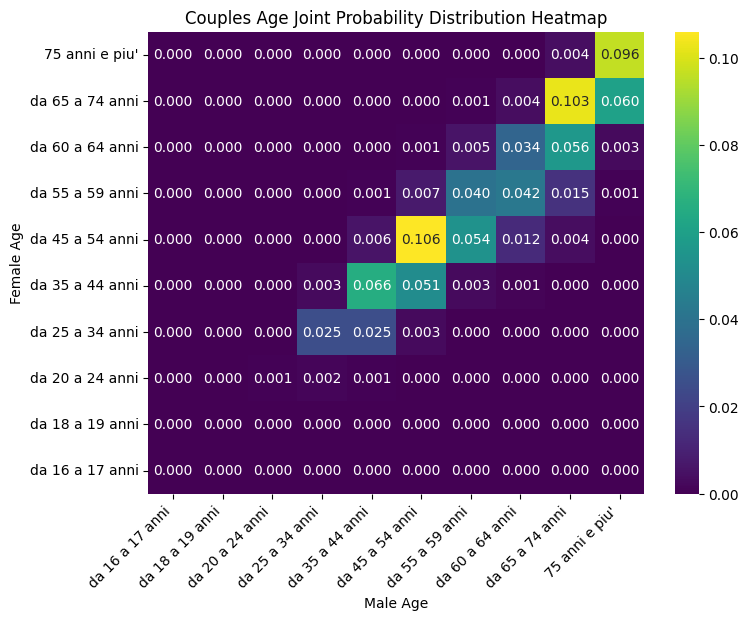

In [7]:
# Plot the results
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    joint_prob_heatmap[:,1:],
    cmap="viridis",
    annot=True,
    fmt=".3f"
)

# Set x and y labels
age_labels = avq.get_attribute_metadata("ETAMi", print_output=False)
xticks = joint_prob_heatmap.columns[1:]
yticks = joint_prob_heatmap.select(pl.col("female_age")).to_series().unique().sort(descending=True)
ax.set_xticks([el+0.5 for el in range(len(xticks))])
ax.set_xticklabels([age_labels.get(int(val)) for val in xticks], rotation=45, ha='right')

ax.set_yticks([el+0.5 for el in range(len(yticks))])
ax.set_yticklabels([age_labels.get(val) for val in yticks], rotation=0, ha='right')

plt.title("Couples Age Joint Probability Distribution Heatmap")
plt.xlabel("Male Age")
plt.ylabel("Female Age")
plt.show()